In [26]:
from tensorflow.keras.models import load_model
import os
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [27]:
model = load_model('./Weights/model_resnetV50.h5') # ./Weights/model_resnetV50.h5 # ./Weights/model_inceptionV3.h5

In [28]:
location = 'D:/Downloads/DMPA MINI PROJECT/archive/Training/glioma_tumor/gg (1).jpg'

In [29]:
def standardize(img):
    # calculate per-channel means and standard deviations
    means = img.mean(axis=(0,1), dtype='float64')
    stds = img.std(axis=(0,1), dtype='float64')

    # per-channel standardization of pixels
    img = (img - means) / stds
    return img

In [30]:
predictedLabel = ['Meningioma','Glioma','Pituitary']

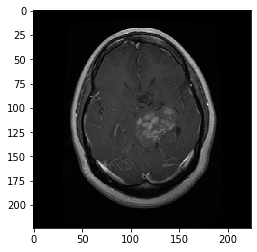

In [31]:
test_image = image.load_img(location, target_size = (224, 224))

plt.imshow(test_image, interpolation='nearest')

test_image = image.img_to_array(test_image)

test_image = standardize(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)

In [32]:
print("Result matrix: ",result)
print(f"Predicted Class = {predictedLabel[np.argmax(result)]} with an accuracy of {np.max(result)*100}%")

Result matrix:  [[2.2411352e-05 9.9994671e-01 3.0857958e-05]]
Predicted Class = Glioma with an accuracy of 99.99467134475708%
